<a href="https://colab.research.google.com/github/WittmannF/data-science-jobs-scrapper/blob/master/LinkedinDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install Requirements
!pip install wordcloud

In [0]:
# All Imports
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
# Parameters
LKIN_DB = 'https://raw.githubusercontent.com/WittmannF/data-science-jobs-scrapper/master/linkedin_data_science_jobs.csv'

In [0]:
# Functions

In [0]:
# Execution

In [1]:
!wget {LKIN_DB}

--2020-04-23 01:15:56--  https://raw.githubusercontent.com/WittmannF/data-science-jobs-scrapper/master/linkedin_data_science_jobs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648058 (633K) [text/plain]
Saving to: ‘linkedin_data_science_jobs.csv’

linkedin_data_scien 100%[===================>] 632.87K  --.-KB/s    in 0.06s   

2020-04-23 01:15:57 (9.57 MB/s) - ‘linkedin_data_science_jobs.csv’ saved [648058/648058]



In [0]:
df = pd.read_csv('linkedin_data_science_jobs.csv', index_col=0)

In [6]:
df.head()

,company,title,location,criteria,description
0,PagSeguro PagBank,Engenheiro de Dados - Data & Analytics,"Prefeitura Regional da Sé, SP",Nível de experiência\nPleno-sênior\nTipo de tr...,O PagSeguro foi criado para oferecer soluções ...
1,Banco PAN,Especialista de Proteção de Dados,"São Paulo, SP",Nível de experiência\nPleno-sênior\nTipo de tr...,Todas as nossas vagas também são dedicadas à D...
2,Avon,Arquiteto de Dados Sr,"São Paulo, Brasil",Nível de experiência\nPleno-sênior\nTipo de tr...,"Atividades: \n\nDesenvolvimento, validação e ..."
3,Banco Inter,ARQUITETO DE DADOS,"Mesorregião Metropolitana de Belo Horizonte, MG",Nível de experiência\nJúnior\nTipo de trabalho...,ARQUITETO DE DADOS\n\nVem pra nossa revolução....
4,Grupo Boticário,Engenheiro de dados,"Curitiba, PR",Nível de experiência\nPleno-sênior\nTipo de tr...,Como será seu dia?\nBuscamos um (a) Analista d...


In [8]:
df['company'].value_counts().head()

Inovation IT Premium Outsourcing    12
PagSeguro PagBank                   12
FAPESP                              11
Kunumi                               6
Ame Digital                          6
Name: company, dtype: int64

In [9]:
df['location'].value_counts().head()

São Paulo, SP         95
Belo Horizonte, MG    17
Niterói, RJ           17
São Paulo e Região    14
Rio de Janeiro, RJ    12
Name: location, dtype: int64

In [10]:
df['title'].value_counts().head()

Cientista de Dados                   9
Analista de Business Intelligence    6
Data Scientist                       5
Cientista de dados                   4
Analista de Desenvolvimento          4
Name: title, dtype: int64

In [18]:
for crit, number in df['criteria'].value_counts().head().iteritems():
    print(crit)
    print(number)
    print('='*80)

Nível de experiência
Assistente
Tipo de trabalho
Tempo integral
Função
Tecnologia da informação
Setores
Tecnologia da informação e serviços SoftwareInternet
18
Nível de experiência
Assistente
Tipo de trabalho
Tempo integral
Função
Tecnologia da informação
Setores
Tecnologia da informação e serviços Recrutamento e seleçãoRecursos humanos
13
Nível de experiência
Júnior
Tipo de trabalho
Tempo integral
Função
Desenvolvimento de negóciosVendas
Setores
Tecnologia da informação e serviços Recrutamento e seleçãoRecursos humanos
13
Nível de experiência
Assistente
Tipo de trabalho
Tempo integral
Função
EngenhariaTecnologia da informação
Setores
Tecnologia da informação e serviços SoftwareInternet
10
Nível de experiência
Assistente
Tipo de trabalho
Tempo integral
Função
PesquisaAnalistaTecnologia da informação
Setores
Tecnologia da informação e serviços Ensino superiorPesquisa
7


In [0]:
description_as_text = ''.join(df['description'].values)

In [22]:
len(description_as_text)

561806

In [0]:
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=40).generate(description_as_text)

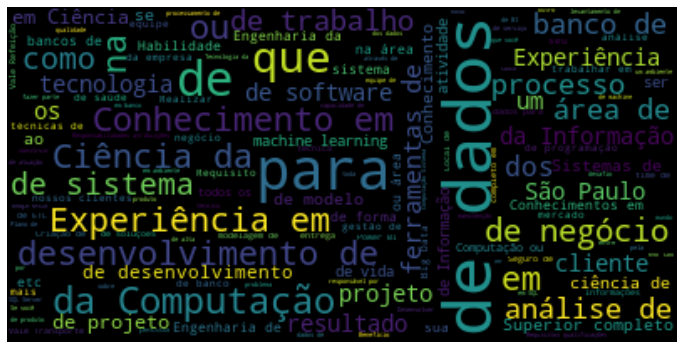

In [31]:
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
# Remove stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

en_stopwords = stopwords.words('english')
pt_stopwords = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
pt_stopwords[:5]

['de', 'a', 'o', 'que', 'e']

In [36]:
type(description_as_text)

str

In [0]:
all_phrases = description_as_text.split('\n')
# Remove blank elements
all_phrases = [phrase for phrase in all_phrases if len(phrase)>0]

In [51]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [0]:
all_words = []

for phrase in all_phrases:
    all_words.extend(phrase.split())

In [54]:
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
all_words = [w.translate(table) for w in all_words]
print(all_words[:100])

['O', 'PagSeguro', 'foi', 'criado', 'para', 'oferecer', 'soluções', 'inovadoras', 'simples', 'e', 'seguras', 'em', 'meios', 'de', 'pagamento', 'Trabalhando', 'conosco', 'você', 'tem', 'a', 'oportunidade', 'de', 'fazer', 'a', 'diferença', 'na', 'vida', 'de', 'milhões', 'de', 'brasileiros', 'e', 'construir', 'novas', 'formas', 'de', 'se', 'fazer', 'e', 'receber', 'pagamentos', 'Trabalhamos', 'em', 'times', 'multidisciplinares', 'e', 'cultivamos', 'uma', 'filosofia', 'de', 'trabalho', 'ágil', 'e', 'enxuta', 'com', 'as', 'áreas', 'de', 'Tecnologia', 'e', 'de', 'Negócios', 'trabalhando', 'lado', 'a', 'lado', 'para', 'criar', 'produtos', 'que', 'evoluam', 'de', 'forma', 'iterativa', 'para', 'entregar', 'valor', 'aos', 'clientes', 'Requisitos', 'Superior', 'completo', 'em', 'Tecnologia', 'da', 'Informação', 'Engenharia', 'da', 'Computação', 'Ciência', 'da', 'Computação', 'ou', 'áreas', 'correlatas', 'Garantir', 'a', 'preparação', 'dos', 'dados']


In [0]:
# Lower all words
all_words = [w.lower() for w in all_words]

In [56]:
all_words[:20]

['o',
 'pagseguro',
 'foi',
 'criado',
 'para',
 'oferecer',
 'soluções',
 'inovadoras',
 'simples',
 'e',
 'seguras',
 'em',
 'meios',
 'de',
 'pagamento',
 'trabalhando',
 'conosco',
 'você',
 'tem',
 'a']

In [59]:
all_words[0] not in pt_stopwords

False

In [0]:
all_words = [w for w in all_words if w not in pt_stopwords]

In [0]:
description_as_text_clean = ' '.join(all_words)

In [64]:
# We removed 100k chars 
len(description_as_text_clean)

451478

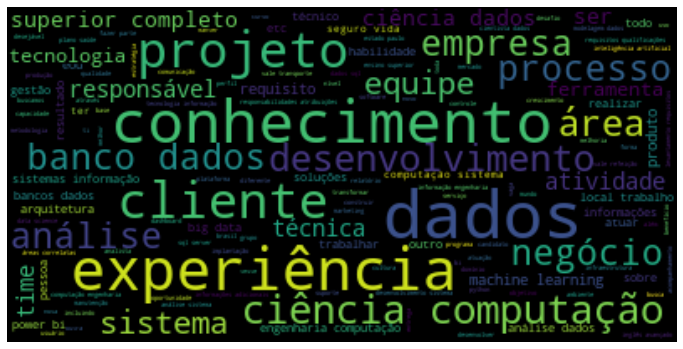

In [66]:
# Generate a word cloud image with the clean text
wordcloud = WordCloud(max_font_size=40).generate(description_as_text_clean)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
drop_list = ['projeto', 'empresa', 'conhecimento', 'experiência', 'ciência', 'computação', 'negócio',
             'técnica', 'local', 'trabalho', 'tecnologia', 'responsável', 'sistema', 'sistemas', 
             'outro', 'desenvolvimento', 'área', 'time', 'pessoa', 'dados', 'ter', 'software', 
             'ferramenta', 'habilidade', 'soluções', 'cliente']

In [0]:
description_as_text_clean = ' '.join([w for w in all_words if w not in drop_list])

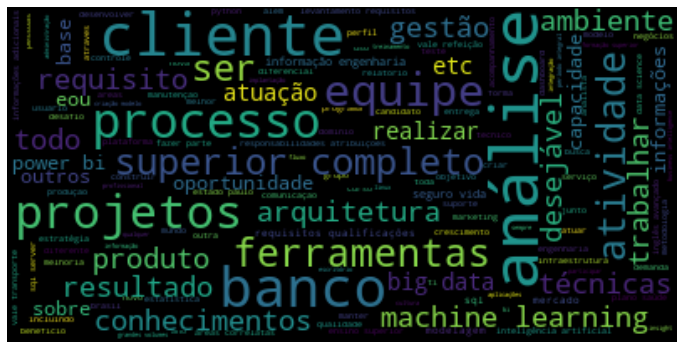

In [76]:
# Generate a word cloud image with the clean text
wordcloud = WordCloud(max_font_size=40).generate(description_as_text_clean)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [79]:
# TODO: Usar um word embedding para encontrar um cluster de habilidades
# Vou exportar o texto limpo para fazer isso em outro notebook
description_as_text_clean[:100]

'pagseguro criado oferecer inovadoras simples seguras meios pagamento trabalhando conosco oportunidad'

In [0]:
with open("linkedin_all_description_clean.txt", "w") as text_file:
    text_file.write(description_as_text_clean)